In [1]:
#https://github.com/dsrscientist/dataset1/blob/master/titanic_train.csv

In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import scipy.stats as stats
import pylab
from pandas import Series, DataFrame

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import pickle

In [2]:

df_titanicdata=pd.read_csv('titanic_csv')

In [3]:

df_titanicdata

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df_titanicdata.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# creating new dataframe
data = df_titanicdata[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]


In [8]:
# Checking the first five rows of the data
data.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0


In [9]:
# Checking the last five rows of the data
data.tail()


,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
886,2,male,27.0,0,0,13.00,0
887,1,female,19.0,0,0,30.00,1
888,3,female,NaN,1,2,23.45,0
889,1,male,26.0,0,0,30.00,1
890,3,male,32.0,0,0,7.75,0


Data Exploration
In this stage, we explore the data with different techniques..



In [10]:
df_titanicdata.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [11]:
df_titanicdata.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
df_titanicdata.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df_titanicdata.drop(['PassengerId','Cabin','Embarked','Name','Ticket','SibSp','Parch'],axis='columns',inplace=True)


In [17]:
df_titanicdata.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [14]:
# Checking the rows and columns of the dataset
print(f"The dataset has {data.shape[0]} rows and {data.shape[1]} columns.")

The dataset has 891 rows and 7 columns.


In [15]:
# Getting more insights of the data using .info() method
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Survived      0
dtype: int64

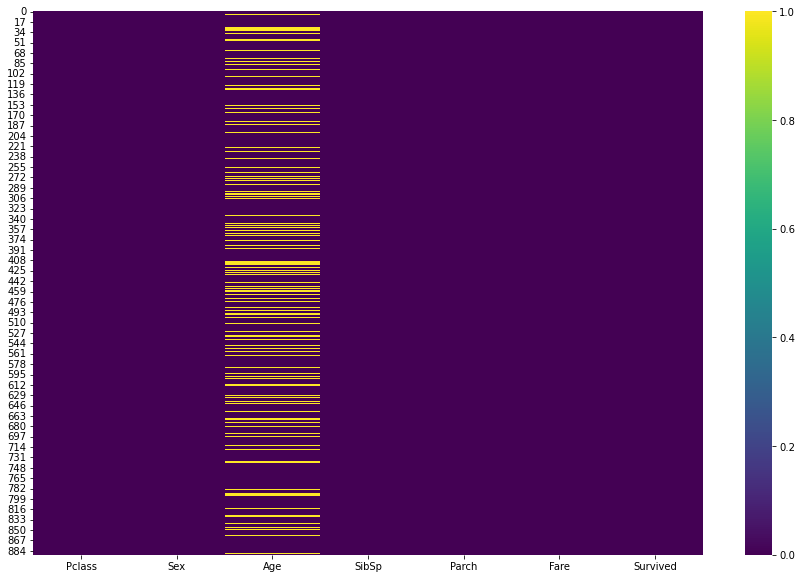

In [16]:
# Chcek Missing values
plt.figure(figsize=(15,10))
sns.heatmap(data.isnull(), cmap='viridis')
data.isnull().sum()


There are many missong values present in the Age feature. We need to impute these missing values before the model creation.



In [17]:
# Statistic of the dataset
data.describe()


,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


now find the survived people-the target variable..

0    549
1    342
Name: Survived, dtype: int64

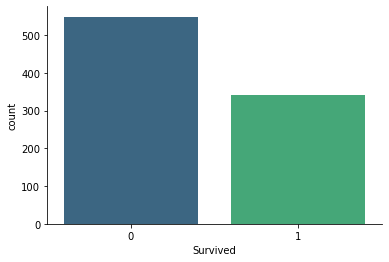

In [18]:
sns.countplot(x = 'Survived', data=data, palette='viridis')
sns.despine()
data['Survived'].value_counts()

Here we can see that the dataset is not imbalanced because both the categories have the sufficient amount of values.

Exploring the Other features other than the target feature

3    491
1    216
2    184
Name: Pclass, dtype: int64

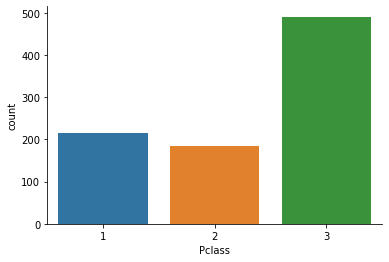

In [19]:
# Exploring Pclass feature
sns.countplot(x='Pclass', data=data)
sns.despine()
data['Pclass'].value_counts()


There most of the passanger are of third class.

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64

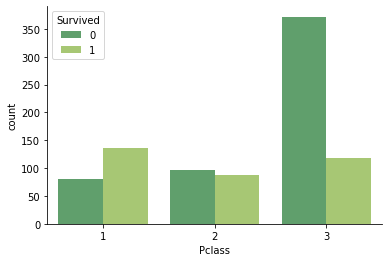

In [20]:
# Pclass vs Survived
sns.countplot(x='Pclass', data=data, hue='Survived', palette='summer')
sns.despine()
data.groupby(['Pclass']).count()['Survived']


from thi we see most of the passanger who are not survived are from third class.

In [22]:
data['Survived'].value_counts()


0    549
1    342
Name: Survived, dtype: int64

male      577
female    314
Name: Sex, dtype: int64

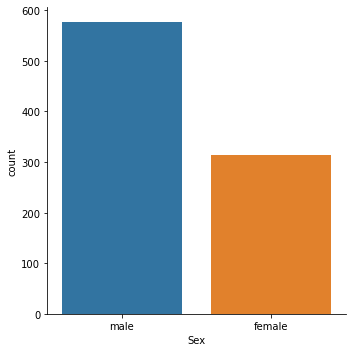

In [23]:
# Exploring Sex feature 
sns.catplot(x='Sex', data=data, kind='count')
data['Sex'].value_counts()

in this we can see here most of the passanger are Male.

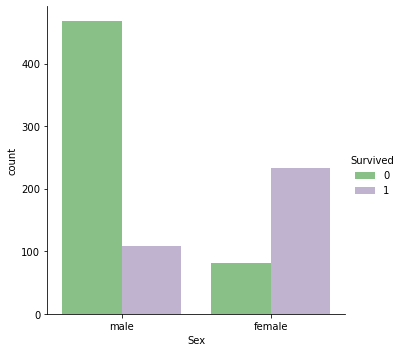

In [24]:
# Sex vs Survived
sns.catplot(x='Sex', data=data, kind='count', hue='Survived', palette='Accent')

Most of the passanger who not survived are male whereas who are survived are most of female.

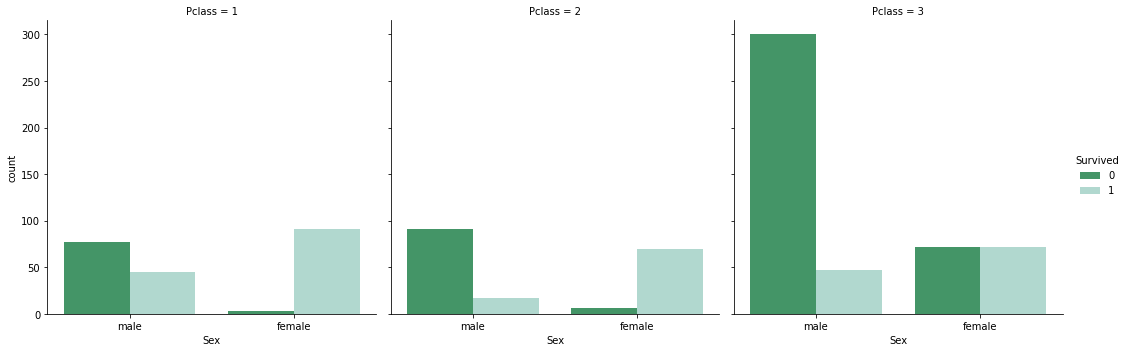

In [25]:
# Pclass vs Sex vs Survived
sns.catplot(x='Sex', data=data, kind='count', hue='Survived', palette='BuGn_r', col='Pclass')


Most of the passanger who not survived are male and from class third.

{'Mean': 29.69911764705882,
 'Standard Deviation': 14.526497332334044,
 'Skewness': 0.38910778230082704}

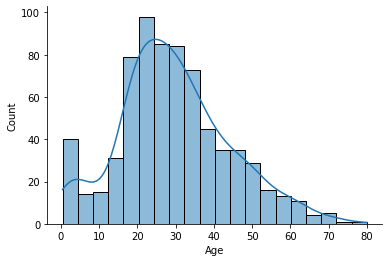

In [26]:
# Exploring Age feature
sns.histplot(data['Age'], kde=True)
sns.despine()
{
    "Mean" : data.Age.mean(),
    "Standard Deviation" : data.Age.std(),
    "Skewness" : data.Age.skew()
}

In [28]:
# Function for Q-Q plot to chcek wether the target feature is normally distributed or not
def plot_data(df, feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[feature], dist='norm', plot=pylab)


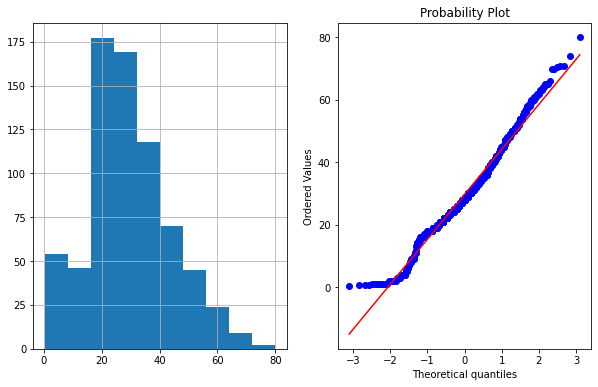

In [31]:
plot_data(data.dropna(), 'Age')

<AxesSubplot:xlabel='Age'>

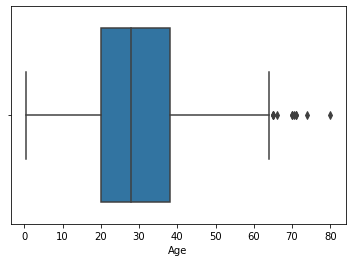

In [32]:
# Check for outliers
sns.boxplot(x='Age', data=data)


There are many missing values present.

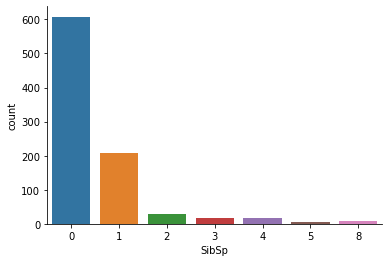

In [33]:
# Exploring SibSp feature
sns.countplot(x='SibSp', data=data)
data['SibSp'].value_counts()
sns.despine()


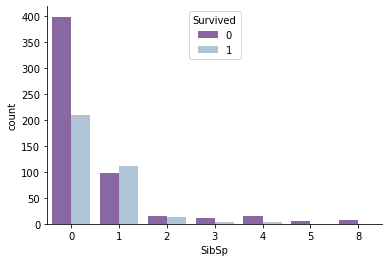

In [34]:
# SibSp Vs Survived
sns.countplot(x='SibSp', hue='Survived', data=data, palette="BuPu_r")
sns.despine()

Most of the passangers not survived who have no any sibling or spouse.

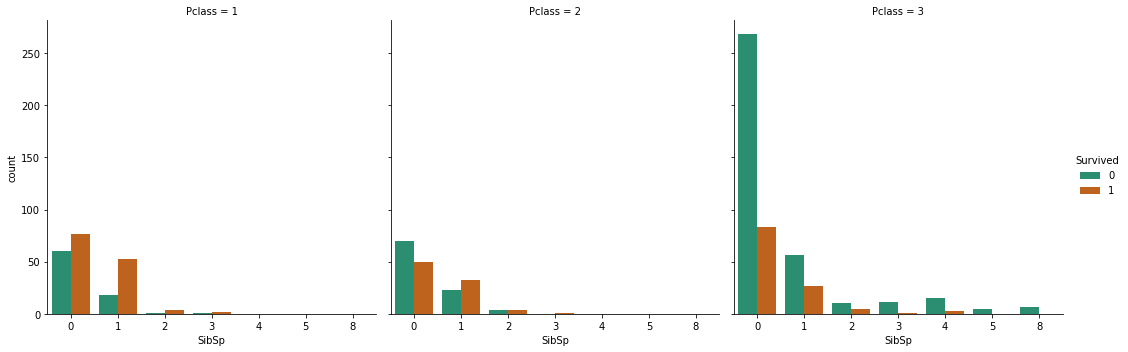

In [35]:
sns.catplot(x='SibSp', hue='Survived', data=data, palette="Dark2", col='Pclass', kind='count')

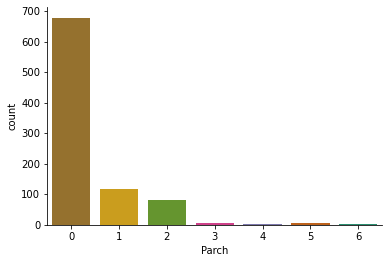

In [36]:
# Exploring Parch feature
sns.countplot(x='Parch', data=data, palette='Dark2_r')
data['SibSp'].value_counts()
sns.despine()


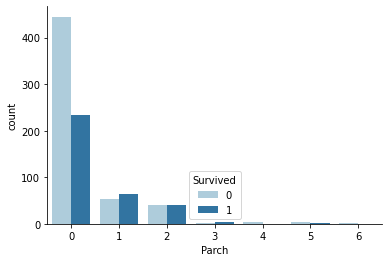

In [37]:
# Parch Vs Survived
sns.countplot(x='Parch', hue='Survived', data=data, palette="Paired")
sns.despine()


Most of the passangers not survived who have no any Parent or children.



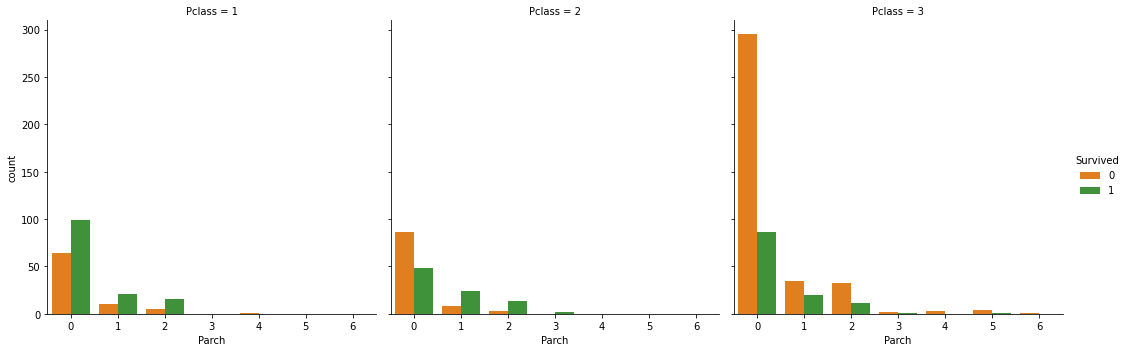

In [38]:
sns.catplot(x='Parch', hue='Survived', data=data, palette="Paired_r", col='Pclass', kind='count')

<AxesSubplot:xlabel='Fare', ylabel='Count'>

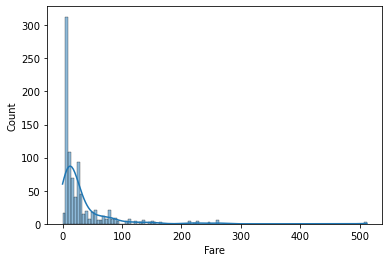

In [39]:
# Exploring Fare feature
sns.histplot(data['Fare'], kde=True)


Here we can see that the data is rightly skewed.



<AxesSubplot:xlabel='Fare'>

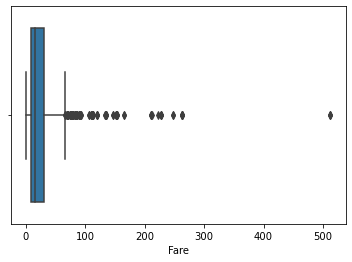

In [40]:
# Chcek for outliers
sns.boxplot('Fare', data=data)

There are many missing values present.



<AxesSubplot:>

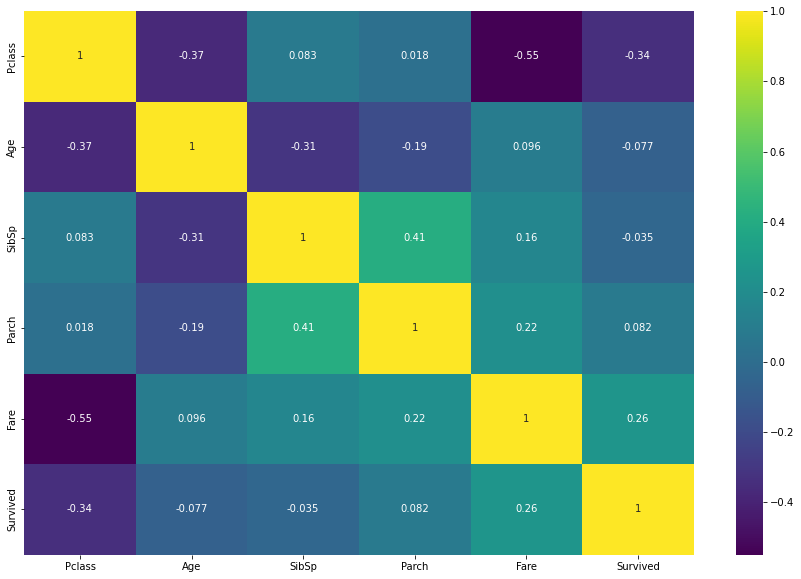

In [41]:
# Ploting Correlation chart
plt.figure(figsize=(15,10))
data_corr = data.corr()
sns.heatmap(data_corr, annot=True, cmap='viridis')


There is no multilinearity present in the data set

Data Pre-Processing the dat ready for machine learning model..

In [42]:
def impute_nan_random(df, feature):
    # Taking the random sample
    random_sample = df[feature].dropna().sample(df[feature].isnull().sum(), random_state=0)
    
    # Mapping the index with the feature name
    random_sample.index = df[df[feature].isnull()].index
    
    #Replace the indexes
    df.loc[df[feature].isnull(), feature] = random_sample


In [43]:
impute_nan_random(data, 'Age')

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Survived    0
dtype: int64

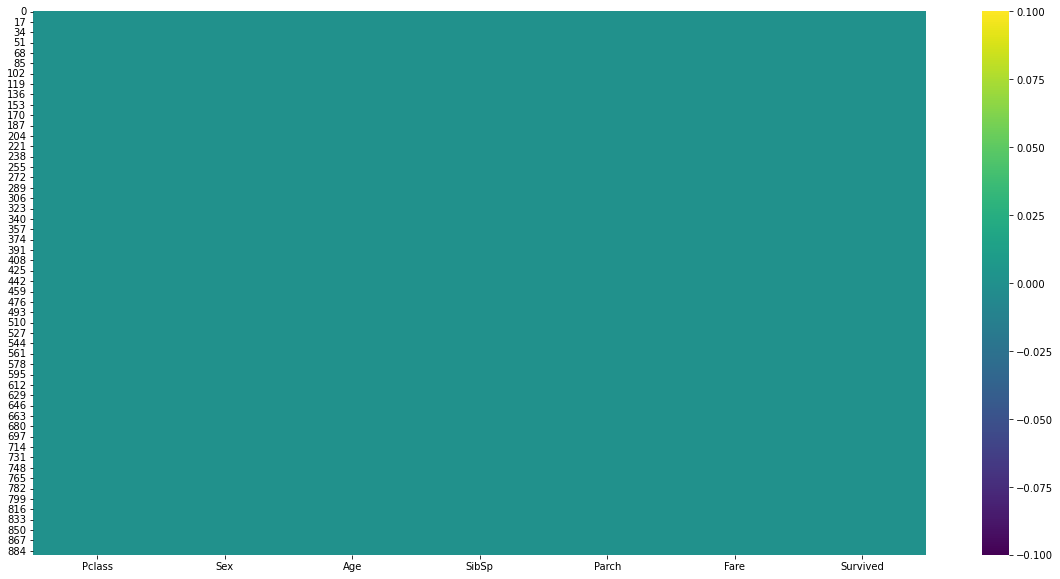

In [44]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isnull(), cmap='viridis')
data.isnull().sum()

there is no missing values present in the dataset 
 
 handling outliers

In [45]:
lower_boundary=data['Age'].mean() - 3* data['Age'].std()
upper_boundary=data['Age'].mean() + 3* data['Age'].std()
(lower_boundary,upper_boundary)


(-13.990614345024845, 73.39131019238735)

In [46]:
data.loc[data['Age'] > upper_boundary,'Age'] = upper_boundary

<AxesSubplot:xlabel='Age'>

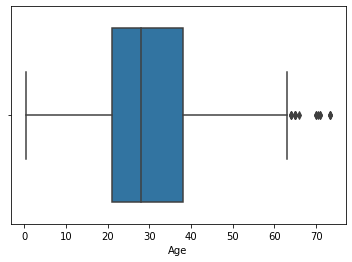

In [47]:
sns.boxplot('Age', data=data)

In [48]:
IQR=data.Fare.quantile(0.75)-data.Fare.quantile(0.25)
lower_bridge=data['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['Fare'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)


-26.724
65.6344


(None, None)

In [49]:
data.loc[data['Fare']>=upper_boundary,'Fare']=upper_boundary

<AxesSubplot:xlabel='Fare'>

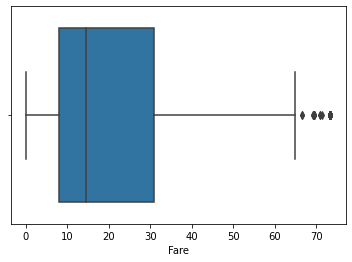

In [50]:
sns.boxplot('Fare', data=data)


Hence there are not much outliers present now.

handling categorical values

In [51]:
# Encode the Sex feature...
data['Sex'] = pd.get_dummies(data['Sex'], drop_first=True)


In [52]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,0


In [53]:
# Separate the other features and the target fetaures
X = data.drop('Survived', axis=1)
y = data['Survived']


In [55]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000
887,1,0,19.0,0,0,30.0000
888,3,0,15.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [56]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

#Scale the data to the same range...


In [57]:
# Scaling the values in the common range 
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)


In [58]:
X_scaled

array([[ 0.82737724,  0.73769513, -0.52979012,  0.43279337, -0.47367361,
        -0.79033257],
       [-1.56610693, -1.35557354,  0.57324552,  0.43279337, -0.47367361,
         2.06170756],
       [ 0.82737724, -1.35557354, -0.25403121, -0.4745452 , -0.47367361,
        -0.7602681 ],
       ...,
       [ 0.82737724, -1.35557354, -1.01236821,  0.43279337,  2.00893337,
        -0.06878534],
       [-1.56610693,  0.73769513, -0.25403121, -0.4745452 , -0.47367361,
         0.22295134],
       [ 0.82737724,  0.73769513,  0.15960716, -0.4745452 , -0.47367361,
        -0.7680626 ]])

Split the data into train and test set.

Now our data is ready to feed to the program. But here we'll split the data into train and test dataset so that after training the model we can test the model on the test dataset and find out how accurate are its predictions.

Here we are splitting the data so that the training dataset contains 80% of the data and the test dataset contains 20% of the total data.

Here we are using the train_test_split method from the sklearn library. We'll train our model on x_train and y_train, test it on x_test and y_test.

test_size: Here we specify the size we want for our test dataset.

random_state: When we use a random number generator for number or sequence generation, we give a starting number (AKA seed). When we provide the same seed, every time it’ll generate the same sequence as the first one. That’s why to keep the same random values every time, we give seed as random_state in train_test_split().



In [59]:
# Splitting the dataset into testing and training data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=74)


In [60]:
#display the shapes of the x and y train and test dataset.
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 6) (179, 6) (712,) (179,)


*Training the Model using Decision Tree Classifier


In [61]:
# Importing and Creating the instance of the DecisionTree classifier, fit the model and Make the prediction for test data
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
y_pred


array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [62]:
# Confusion Matrix
confusion_matrix(y_test, y_pred)


array([[95, 17],
       [13, 54]], dtype=int64)

In [68]:
# function to print differnet performace scores
def score(y_test, y_pred):
    different_score = {
        "Accuarcy Score" : accuracy_score(y_test, y_pred),
        "Precision Score" : precision_score(y_test, y_pred, average='weighted'),
        "Recall Score" : recall_score(y_test, y_pred, average='weighted'),
        "F1 Score" : f1_score(y_test, y_pred, average='weighted')
    }
    return different_score


In [69]:
print(f"The Accuarcy Score of Decision Tree Classifier is: {round(score(y_test, y_pred)['Accuarcy Score'], 2)*100}%")
print(f"The Precision Score of Decision Tree Classifier is: {round(score(y_test, y_pred)['Precision Score'], 2)*100}%")
print(f"The Recall Score of Decision Tree Classifier is: {round(score(y_test, y_pred)['Recall Score'], 2)*100}%")
print(f"The F1 Score of Decision Tree Classifier is: {round(score(y_test, y_pred)['F1 Score'], 2)*100}%")


The Accuarcy Score of Decision Tree Classifier is: 83.0%
The Precision Score of Decision Tree Classifier is: 84.0%
The Recall Score of Decision Tree Classifier is: 83.0%
The F1 Score of Decision Tree Classifier is: 83.0%


In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       112
           1       0.76      0.81      0.78        67

    accuracy                           0.83       179
   macro avg       0.82      0.83      0.82       179
weighted avg       0.84      0.83      0.83       179



Improveing the Classifier Accuarcy..


In [71]:
path = dt_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alpha = path.ccp_alphas

In [72]:
decision_tree_list = []
for ccp in ccp_alpha:
    dt = DecisionTreeClassifier(ccp_alpha=ccp)
    dt.fit(X_train, y_train)
    decision_tree_list.append(dt)

In [73]:
train_score = [dt_model.score(X_train,y_train) for dt_model in decision_tree_list]

In [74]:
test_score = [dt_model.score(X_test,y_test) for dt_model in decision_tree_list]

In [75]:
training_and_testing_sets_score_list = []
for i in range(len(test_score)):
    diff = train_score[i] - test_score[i]
    training_and_testing_sets_score_list.append(diff)

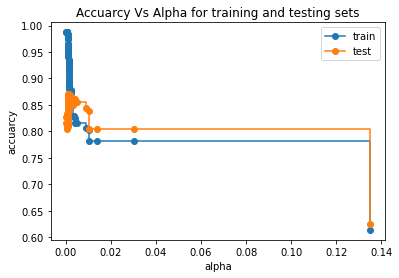

In [80]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuarcy")
ax.set_title("Accuarcy Vs Alpha for training and testing sets")
ax.plot(ccp_alpha, train_score, marker = 'o', label="train", drawstyle="steps-post")
ax.plot(ccp_alpha, test_score, marker = 'o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()


In [81]:
# Minimum difference between train and test score
Series(training_and_testing_sets_score_list)[pd.Series(training_and_testing_sets_score_list) > 0].min()


0.0019615843324336524

In [82]:
# Minimum difference between train and test score index
list(Series(training_and_testing_sets_score_list)[Series(training_and_testing_sets_score_list) == 0.0019615843324336524].index)


[63, 64]

In [83]:
# Best ccp_alpha values for decision tree
Series(decision_tree_list)[[62, 63]].values


array([DecisionTreeClassifier(ccp_alpha=0.0024968789013732843),
       DecisionTreeClassifier(ccp_alpha=0.002740621841745438)],
      dtype=object)

In [84]:
# Importing and Creating the instance of the DecisionTree classifier, fit the model and Make the prediction for test data
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(ccp_alpha=0.0027)
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
y_pred


array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [85]:
# Confusion Matrix
confusion_matrix(y_test, y_pred)


array([[99, 13],
       [11, 56]], dtype=int64)

In [86]:
print(f"The Accuarcy Score of Decision Tree Classifier is: {round(score(y_test, y_pred)['Accuarcy Score'], 2)*100}%")
print(f"The Precision Score of Decision Tree Classifier is: {round(score(y_test, y_pred)['Precision Score'], 2)*100}%")
print(f"The Recall Score of Decision Tree Classifier is: {round(score(y_test, y_pred)['Recall Score'], 2)*100}%")
print(f"The F1 Score of Decision Tree Classifier is: {round(score(y_test, y_pred)['F1 Score'], 2)*100}%")

The Accuarcy Score of Decision Tree Classifier is: 87.0%
The Precision Score of Decision Tree Classifier is: 87.0%
The Recall Score of Decision Tree Classifier is: 87.0%
The F1 Score of Decision Tree Classifier is: 87.0%


In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       112
           1       0.81      0.84      0.82        67

    accuracy                           0.87       179
   macro avg       0.86      0.86      0.86       179
weighted avg       0.87      0.87      0.87       179



 another model try then save the model in a pickle file


In [89]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [90]:
from sklearn.linear_model import LogisticRegression
l=LogisticRegression()

In [91]:
l.fit(x_train,y_train)

LogisticRegression()

In [92]:
l.score(x_test,y_test)

0.7877094972067039

The Accuarcy Score of Decision Tree Classifier is: 87.0%
The Precision Score of Decision Tree Classifier is: 87.0%
The Recall Score of Decision Tree Classifier is: 87.0%
The F1 Score of Decision Tree Classifier is: 87.0%
    so we go with decision tree classifier

In [95]:
# Save the model to disk
pickle.dump(dt_clf, open('model.pkl', 'wb'))
